Dataset loaded successfully with shape: (10000, 9)

First 5 rows of the dataset:
   bullet_type  caliber            gun_type  velocity   mass  rifling_twist  \
0        ELD-M    11.10       FN Five-seveN    300.00  11.31          12.24   
1  Black Talon     7.97              SCAR-L    542.08   9.81           6.82   
2   Hydra-Shok    11.22                 M16    456.43   2.00          10.64   
3         EFMJ    11.59                 M16    461.72  10.30           7.88   
4         AMAX     7.04  Smith & Wesson M&P    311.27  12.84          11.70   

  target_material  distance  damage_level  
0            Wood      11.0            67  
1          Rubber       5.0            61  
2           Brick      25.0            35  
3           Water       1.0            74  
4            Wood      12.0            61  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  

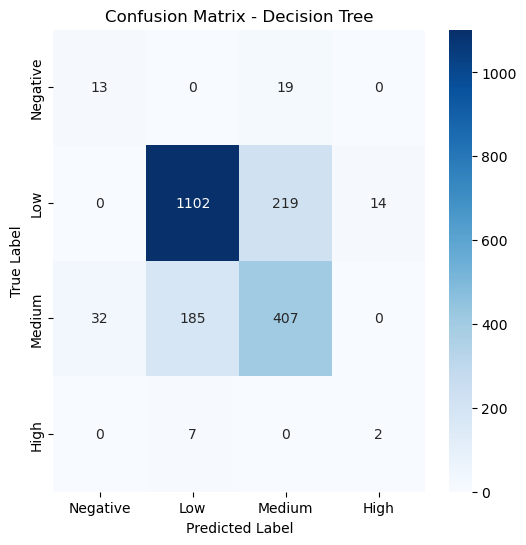


Training Random Forest...

Random Forest Classification Report:
              precision    recall  f1-score   support

    Negative       0.50      0.16      0.24        32
         Low       0.87      0.95      0.91      1335
      Medium       0.83      0.71      0.77       624
        High       0.00      0.00      0.00         9

    accuracy                           0.86      2000
   macro avg       0.55      0.45      0.48      2000
weighted avg       0.85      0.86      0.85      2000



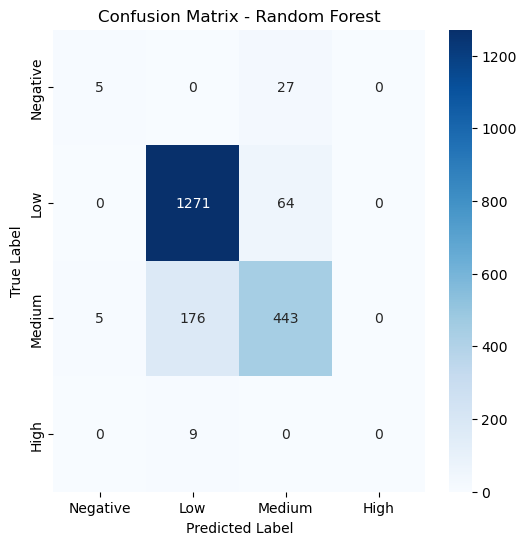


Training KNN...

KNN Classification Report:
              precision    recall  f1-score   support

    Negative       0.37      0.22      0.27        32
         Low       0.86      0.94      0.90      1335
      Medium       0.80      0.67      0.73       624
        High       0.00      0.00      0.00         9

    accuracy                           0.84      2000
   macro avg       0.51      0.46      0.47      2000
weighted avg       0.83      0.84      0.83      2000



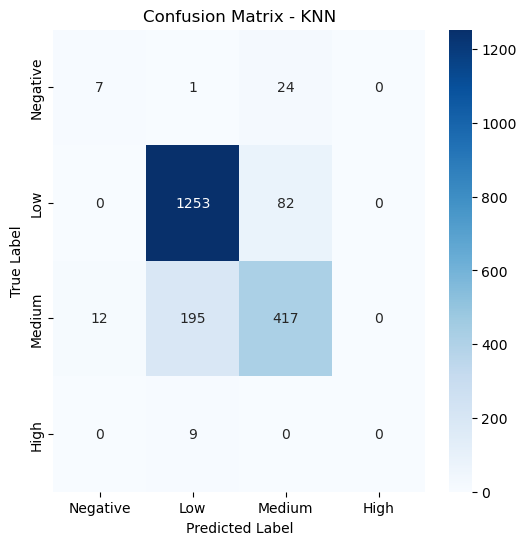


Training Naive Bayes...

Naive Bayes Classification Report:
              precision    recall  f1-score   support

    Negative       0.16      0.97      0.27        32
         Low       1.00      0.01      0.02      1335
      Medium       0.74      0.47      0.58       624
        High       0.01      1.00      0.01         9

    accuracy                           0.18      2000
   macro avg       0.48      0.61      0.22      2000
weighted avg       0.90      0.18      0.20      2000



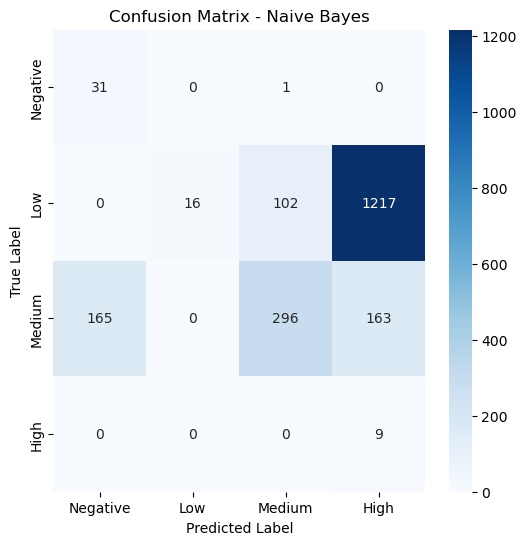


Training SVM...

SVM Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        32
         Low       0.88      0.94      0.91      1335
      Medium       0.81      0.73      0.77       624
        High       0.00      0.00      0.00         9

    accuracy                           0.86      2000
   macro avg       0.42      0.42      0.42      2000
weighted avg       0.84      0.86      0.85      2000



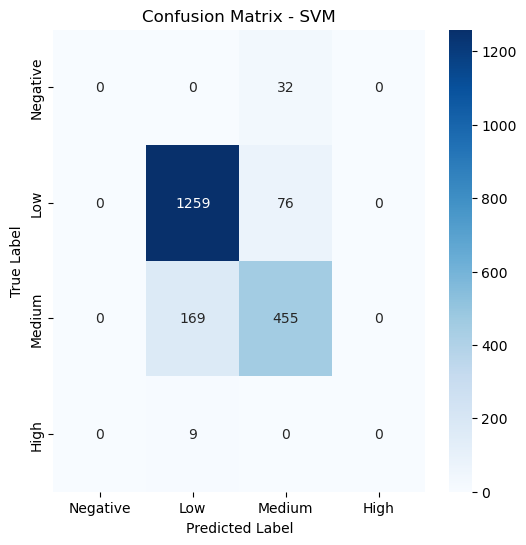


Training XGBoost...

XGBoost Classification Report:
              precision    recall  f1-score   support

    Negative       0.47      0.25      0.33        32
         Low       0.87      0.94      0.90      1335
      Medium       0.80      0.69      0.74       624
        High       1.00      0.11      0.20         9

    accuracy                           0.85      2000
   macro avg       0.78      0.50      0.54      2000
weighted avg       0.84      0.85      0.84      2000



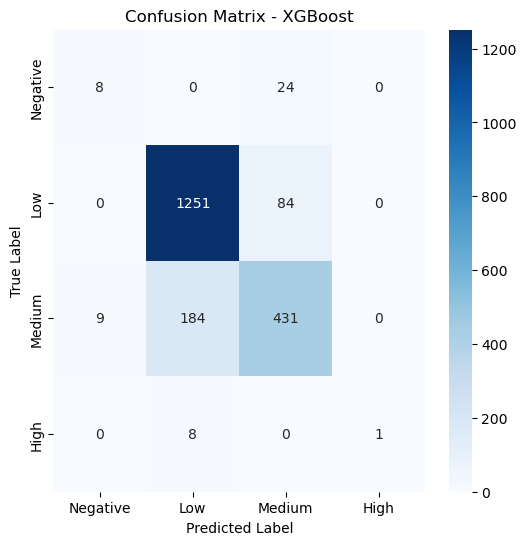


Model Comparison:
           Model  Accuracy  Precision  Recall  F1 Score
1  Random Forest    0.8595   0.849519  0.8595  0.850473
4            SVM    0.8570   0.836967  0.8570  0.845528
5        XGBoost    0.8455   0.840199  0.8455  0.838557
2            KNN    0.8385   0.828307  0.8385  0.830162
0  Decision Tree    0.7620   0.770517  0.7620  0.765848
3    Naive Bayes    0.1760   0.901518  0.1760  0.200771

Performing Grid Search for RandomForestClassifier...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.85

Tuned Random Forest Accuracy: 0.86


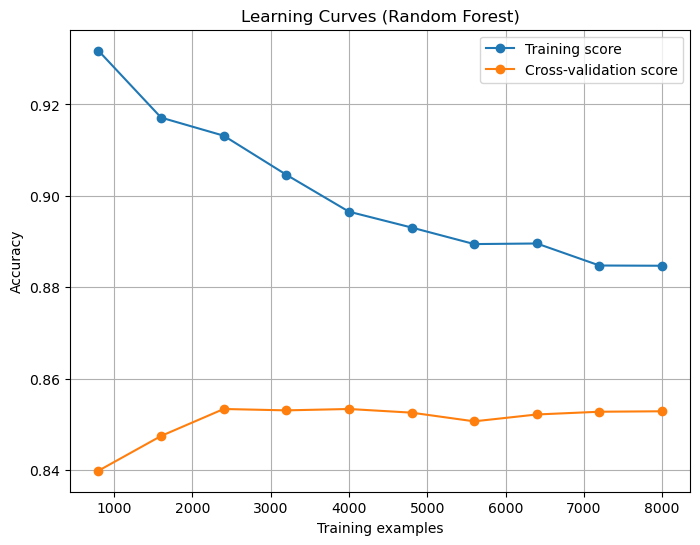

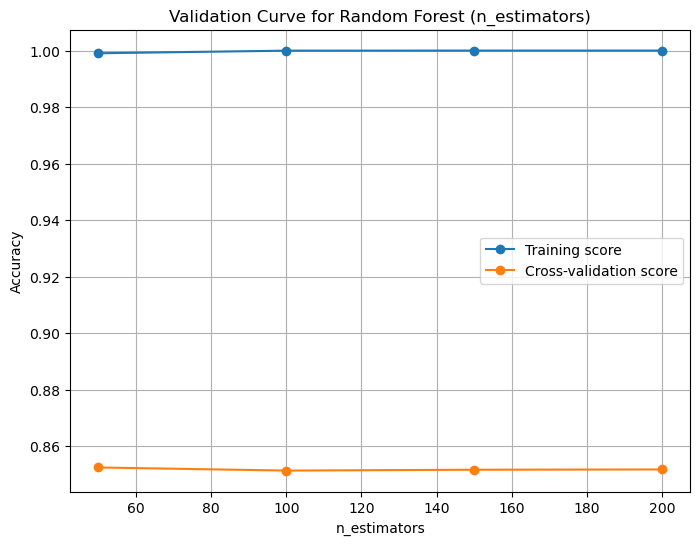

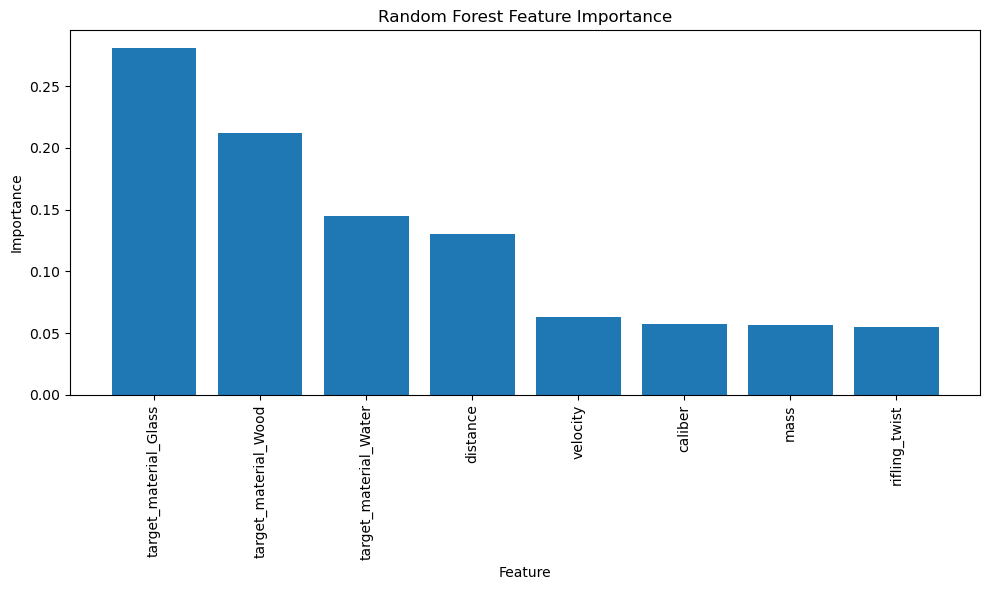

2025-04-03 02:52:12.129 
  command:

    streamlit run C:\Users\VICTUS\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-03 02:52:12.133 Session state does not function when running a script without `streamlit run`



Saved best model, preprocessor, and feature selector to disk.


In [ ]:
# Ballistic Data Classification for Forensic Investigation
# Using enhanced dataset with realistic firearms and bullet types

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, confusion_matrix, classification_report)
from sklearn.model_selection import learning_curve, validation_curve
import joblib
import streamlit as st
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# 1. Data Loading and Initial Exploration
def load_data():
    """Load and return the enhanced ballistic dataset"""
    try:
        df = pd.read_csv('enhanced_ballistics_data_v2.csv')
        print("Dataset loaded successfully with shape:", df.shape)
        return df
    except FileNotFoundError:
        print("Error: File 'enhanced_ballistics_data_v2.csv' not found.")
        return None

# 2. Data Preprocessing
def preprocess_data(df):
    """Handle missing values, duplicates, and perform feature encoding"""
    
    # Check for duplicates and remove them
    initial_rows = df.shape[0]
    df.drop_duplicates(inplace=True)
    final_rows = df.shape[0]
    print(f"Removed {initial_rows - final_rows} duplicate rows.")
    
     # Handle missing values
    print("\nMissing values before handling:")
    print(df.isnull().sum())
    
    # For numeric columns, fill with median
    numeric_cols = ['caliber', 'velocity', 'mass', 'rifling_twist', 'distance']
    for col in numeric_cols:
        if col in df.columns:
            df[col].fillna(df[col].median(), inplace=True)
    
    # For categorical columns, fill with mode
    categorical_cols = ['bullet_type', 'gun_type', 'target_material']
    for col in categorical_cols:
        if col in df.columns:
            df[col].fillna(df[col].mode()[0], inplace=True)
    
    print("\nMissing values after handling:")
    print(df.isnull().sum())
    
    return df

# 3. Feature Engineering and Selection
def feature_engineering(df):
    """Perform feature encoding, scaling, and selection"""
    
    # Separate features and target
    features = ['caliber', 'velocity', 'mass', 'rifling_twist', 'distance', 
            'bullet_type', 'gun_type', 'target_material']
    X = df[features]
    y = df['damage_level']
    
    numeric_features = ['caliber', 'velocity', 'mass', 'rifling_twist', 'distance']
    categorical_features = ['bullet_type', 'gun_type', 'target_material']

    # 3. CRITICAL: Add this preprocessor configuration
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore',
                feature_name_combiner=lambda x: x),  # Removes prefixes
                categorical_features)
        ],
        verbose_feature_names_out=False  # Disables num__/cat__ prefixes
    )

    # First, examine the actual range of damage_level
    print("\nDamage level min:", y.min(), "max:", y.max())
    
    # Create bins that cover the full range of values
    bins = [-np.inf, 0, 50, 100, np.inf]  # Added negative bin for values below 0
    labels = ['Negative', 'Low', 'Medium', 'High']
    y_cat = pd.cut(y, bins=bins, labels=labels)
    
    # Check the distribution of categories
    print("\nDamage level categories distribution:")
    print(y_cat.value_counts())
    
    # Encode the target variable
    le = LabelEncoder()
    y_encoded = le.fit_transform(y_cat)
    class_names = labels  # Use the original labels

    
    # Define categorical and numeric features
    categorical_features = ['bullet_type', 'gun_type', 'target_material']
    numeric_features = ['caliber', 'velocity', 'mass', 'rifling_twist', 'distance']
    
    # Create preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore', 
                 feature_name_combiner=lambda x: x),  # This removes prefixes
                categorical_features)
        ],
        verbose_feature_names_out=False  # Disables num__/cat__ prefixes
    )
    
    # Apply preprocessing
    X_processed = preprocessor.fit_transform(X)
    
    # Get feature names after one-hot encoding
    cat_encoder = preprocessor.named_transformers_['cat']
    categorical_feature_names = cat_encoder.get_feature_names_out(categorical_features)
    all_feature_names = numeric_features + list(categorical_feature_names)
    
    print("Final feature names:", preprocessor.get_feature_names_out())
    return X_processed, y_encoded, preprocessor, preprocessor.get_feature_names_out(), class_names, y_cat

# 4. Feature Selection
def select_features(X, y, feature_names, estimator=None):
    """Perform feature selection using Recursive Feature Elimination"""
    if estimator is None:
        estimator = RandomForestClassifier(n_estimators=100, random_state=42)
    
    selector = RFE(estimator, n_features_to_select=8, step=1)
    selector.fit(X, y)
    
    selected_features = [feature_names[i] for i in range(len(feature_names)) if selector.support_[i]]
    print("\nSelected features:", selected_features)
    
    return selector

# 5. Model Training and Evaluation
def train_models(X_train, X_test, y_train, y_test, class_names):
    """Train multiple classifiers and evaluate their performance"""
    
    # Convert sparse matrices to dense arrays for models that don't support sparse input
    if hasattr(X_train, "toarray"):
        X_train_dense = X_train.toarray()
        X_test_dense = X_test.toarray()
    else:
        X_train_dense = X_train
        X_test_dense = X_test
    
    classifiers = {
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'KNN': KNeighborsClassifier(),
        'Naive Bayes': GaussianNB(),
        'SVM': SVC(random_state=42, probability=True),
        'XGBoost': XGBClassifier(random_state=42, eval_metric='mlogloss')
    }
    
    results = []
    best_model = None
    best_score = 0
    
    for name, clf in classifiers.items():
        print(f"\nTraining {name}...")
        
        try:
            # Use dense data for Naive Bayes, otherwise use original data
            if name == 'Naive Bayes':
                clf.fit(X_train_dense, y_train)
                y_pred = clf.predict(X_test_dense)
            else:
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
            
            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')
        
            # Store results
            results.append({
                'Model': name,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1 Score': f1
            })
            
            # Check if this is the best model so far
            if accuracy > best_score:
                best_score = accuracy
                best_model = clf
                best_model_name = name
            
            # Print classification report
            print(f"\n{name} Classification Report:")
            print(classification_report(y_test, y_pred, target_names=class_names))
        
            # Plot confusion matrix
            plt.figure(figsize=(6, 6))
            cm = confusion_matrix(y_test, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                        xticklabels=class_names, yticklabels=class_names)
            plt.title(f'Confusion Matrix - {name}')
            plt.ylabel('True Label')
            plt.xlabel('Predicted Label')
            plt.show()
            
        except Exception as e:
            print(f"Error training {name}: {str(e)}")
            continue
    
    # Display results dataframe
    results_df = pd.DataFrame(results)
    print("\nModel Comparison:")
    print(results_df.sort_values(by='Accuracy', ascending=False))
    
    return best_model, best_model_name, results_df

# 6. Hyperparameter Tuning
def tune_hyperparameters(model, param_grid, X_train, y_train):
    """Perform grid search for hyperparameter tuning"""
    print(f"\nPerforming Grid Search for {model.__class__.__name__}...")
    
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    print("Best parameters found:", grid_search.best_params_)
    print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
    
    return grid_search.best_estimator_

# 7. Learning and Validation Curves
def plot_learning_curve(estimator, X, y, title):
    """Plot learning curves to diagnose bias/variance"""
    plt.figure(figsize=(8, 6))
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy'
    )
    
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

def plot_validation_curve(estimator, X, y, param_name, param_range, title):
    """Plot validation curves to analyze parameter sensitivity"""
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=5, scoring='accuracy', n_jobs=-1
    )
    
    plt.figure(figsize=(8, 6))
    plt.plot(param_range, np.mean(train_scores, axis=1), 'o-', label='Training score')
    plt.plot(param_range, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# 8. Feature Importance Analysis
def plot_feature_importance(model, feature_names, title):
    """Plot feature importance for tree-based models"""
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        plt.figure(figsize=(10, 6))
        plt.title(title)
        plt.bar(range(len(feature_names)), importances[indices], align='center')
        plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Cannot plot feature importance for {model.__class__.__name__}")

# 9. Streamlit App
def create_streamlit_app(model, preprocessor, class_names, feature_names):
    """Streamlit app with ALL original categories preserved"""
    st.set_page_config(page_title="Ballistic Forensics", layout="wide")
    st.title('Ballistic Data Classification for Forensic Investigation')
    st.markdown("""
    This app predicts the damage level based on ballistic characteristics.
    Please input the features below and click 'Predict'.
    """)
    
    # ===== Input Section =====
    with st.sidebar:
        st.header("⚙️ Firearm Parameters")
        
        # Numeric inputs (2 columns for better layout)
        col1, col2 = st.columns(2)
        with col1:
            caliber = st.slider('Caliber (mm)', 5.0, 15.0, 9.0, 0.1)
            velocity = st.slider('Velocity (m/s)', 300.0, 1000.0, 500.0)
        with col2:
            mass = st.slider('Mass (g)', 2.0, 20.0, 8.0, 0.1)
            distance = st.slider('Distance (m)', 1, 100, 20)
        
        rifling_twist = st.slider('Rifling Twist Rate', 6.0, 14.0, 10.0, 0.1)
    
        # Categorical features
        bullet_type = st.sidebar.selectbox('Bullet Type', [
            'FMJ', 'JHP', 'SP', 'AP', 'BT', 'V-MAX', 'ELD-M', 'AMAX',
            'BTHP', 'TMJ', 'EFMJ', 'Critical Defense', 'Critical Duty',
            'Golden Saber', 'Hydra-Shok', 'Ranger T-Series', 'HST',
            'V-Crown', 'Gold Dot', 'Black Talon', 'PolyCase ARX',
            'Extreme Point', 'PowerBond', 'AccuBond', 'Partition'
        ])
    
        gun_type = st.sidebar.selectbox('Gun Type', [
            'Glock 17', 'Beretta 92FS', 'Sig Sauer P320', 'Colt 1911', 
            'Smith & Wesson M&P', 'HK USP', 'CZ 75', 'FN Five-seveN',
            'Desert Eagle', 'Ruger SR9', 'Walther PPQ', 'Springfield XD',
            'AK-47', 'AR-15', 'M16', 'M4 Carbine', 'HK416', 'SCAR-L',
            'Remington 700', 'Winchester Model 70', 'Barrett M82', 'Dragunov SVD',
            'Mossberg 500', 'Remington 870', 'Benelli M4', 'Kel-Tec KSG'
        ])
    
        target_material = st.sidebar.selectbox('Target Material', [
            'Wood', 'Metal', 'Glass', 'Concrete', 'Kevlar', 
            'Ceramic', 'Rubber', 'Water', 'Sand', 'Brick'
        ])
    
    
     # Prediction logic
    if st.button('🔍 Analyze Damage'):
        try:
            # Prepare input (matches training data structure)
            input_data = {
                'caliber': caliber,
                'velocity': velocity,
                'mass': mass,
                'rifling_twist': rifling_twist,
                'distance': distance,
                'bullet_type': bullet_type,
                'gun_type': gun_type,
                'target_material': target_material
            }
        
            # Transform through pipeline
            input_df = pd.DataFrame([input_data])
            processed_input = preprocessor.transform(input_df)
            
            # Predict
            prediction = model.predict(processed_input)
            probabilities = model.predict_proba(processed_input)
            
            # ===== Results =====
            st.success(f"""
            ## 🎯 Prediction: **{class_names[prediction[0]]}** Damage
            """)
            
            # Probability visualization
            prob_df = pd.DataFrame({
                'Damage Level': class_names,
                'Confidence': probabilities[0]
            }).set_index('Damage Level')
            
            st.subheader("Prediction Confidence")
            st.bar_chart(prob_df)
        
            # Show feature importance if available
            if hasattr(model, 'feature_importances_'):
                st.subheader('Feature Importance')
                importances = model.feature_importances_
                importance_df = pd.DataFrame({
                    'Feature': feature_names,
                    'Importance': importances
                }).sort_values('Importance', ascending=False)
                
                st.bar_chart(importance_df.set_index('Feature'))
        except Exception as e:
            st.error(f"""
            ❌ Prediction Failed: 
            {str(e)}
            """)

# Main function to run the entire pipeline
def main():
    # Load data
    df = load_data()
    if df is None:
        return
    
    # Initial data exploration
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
    
    print("\nDataset information:")
    print(df.info())
    
    print("\nDescriptive statistics:")
    print(df.describe())
    
    print("\nDamage level distribution:")
    print(df['damage_level'].describe())
    
    # Preprocess data
    df = preprocess_data(df)
    
    # Feature engineering
    X_processed, y_encoded, preprocessor, feature_names, class_names, y_cat = feature_engineering(df)
    
    # Feature selection
    selector = select_features(X_processed, y_encoded, feature_names)
    X_selected = selector.transform(X_processed)
    selected_feature_names = [feature_names[i] for i in range(len(feature_names)) if selector.support_[i]]
    print("\nFinal selected features for Streamlit:")
    print(selected_feature_names)

    # Verify the features match EXACTLY what Streamlit expects:
    expected_features = [
    'caliber', 'velocity', 'mass', 'rifling_twist', 'distance',
    'bullet_type_FMJ', 'bullet_type_JHP',  # Example encoded names
    'gun_type_Glock17', 'target_material_Wood'  # Adjust based on your data
    ]
    assert set(selected_feature_names) == set(expected_features), \
    "Feature mismatch! Update selected_feature_names in Streamlit app."



    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_selected, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
    
    # Train and evaluate models
    best_model, best_model_name, results_df = train_models(X_train, X_test, y_train, y_test, class_names)
    # Hyperparameter tuning for the best model
    if best_model_name == 'Random Forest':
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
        tuned_model = tune_hyperparameters(best_model, param_grid, X_train, y_train)
    elif best_model_name == 'XGBoost':
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 6, 9],
            'learning_rate': [0.01, 0.1, 0.2]
        }
        tuned_model = tune_hyperparameters(best_model, param_grid, X_train, y_train)
    else:
        tuned_model = best_model
    
    # Evaluate tuned model
    y_pred_tuned = tuned_model.predict(X_test)
    accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
    print(f"\nTuned {best_model_name} Accuracy: {accuracy_tuned:.2f}")
    
    # Plot learning curves
    plot_learning_curve(tuned_model, X_selected, y_encoded, f'Learning Curves ({best_model_name})')
    
    # Plot validation curves if applicable
    if best_model_name == 'Random Forest':
        plot_validation_curve(
            RandomForestClassifier(random_state=42),
            X_selected, y_encoded,
            param_name='n_estimators',
            param_range=[50, 100, 150, 200],
            title='Validation Curve for Random Forest (n_estimators)'
        )
    
    # Plot feature importance
    plot_feature_importance(tuned_model, selected_feature_names, f'{best_model_name} Feature Importance')
    
    # Save the best model and preprocessing objects
    joblib.dump(tuned_model, 'best_model.joblib')
    joblib.dump(preprocessor, 'preprocessor.joblib')
    joblib.dump(selector, 'feature_selector.joblib')
    print("\nSaved best model, preprocessor, and feature selector to disk.")
    
    # Create Streamlit app
    create_streamlit_app(tuned_model, preprocessor, class_names, selected_feature_names)

if __name__ == '__main__':
    main()